Only select float64, int: 
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
Cannot clean columns yet
96.7
97.52
97.52
97.52
97.52
93.04
96.82
97.52
97.52
97.17


,Model,Score
0,Support Vector Machines,97.52
1,KNN,97.52
2,Logistic Regression,97.52
5,Perceptron,97.52
6,Linear SVC,97.52
8,Stochastic Gradient Descent,97.52
9,Gradient Boosting Classifier,97.17
3,Random Forest,96.82
4,Naive Bayes,96.70
7,Decision Tree,93.04


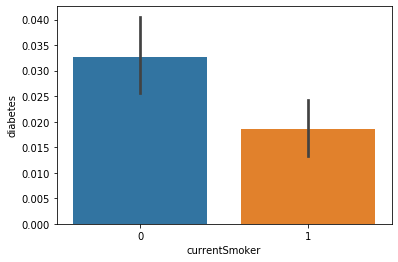

In [4]:
#data analysis libraries 
import numpy as np
import pandas as pd
import sklearn

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Header
csv_file = str(input("What is the name of your csv file?"))
df = pd.read_csv(csv_file)
print('Only select float64, int: \n', df.dtypes)
print('Cannot clean columns yet')
column1 = str(input("What is the first column?"))
column2 = str(input("What is the second column?"))
column3 = str(input("What is the third column?"))
column4 = str(input("What is the fourth column?"))
column5 = str(input("What is the fifth column?"))
df = df[[column1, column2, column3, column4, column5]]

# Clean any data with the average value
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

#Making Training and Testing Sets
predict = str(input("What would you like to predict?"))

X = np.array(df.drop([predict], 1))
y = np.array(df[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

#SVM
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

#Knn or K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

#Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

graph = str(input("Would you like to create a scatter plot or bar graph? (Scatter, Bar)"))
if (graph == "Scatter"):
    p = str(input("Column for X-Axis"))
    style.use("ggplot")
    plt.scatter(df[p],df[predict])
    plt.xlabel(p)
    plt.ylabel(predict)
    plt.show()
elif (graph == "Bar"):
    p = str(input("Column for X-Axis"))
    sns.barplot(x=df[p], y=df[predict], data=df)
else:
    print("End of app.")

# Printing the most accurate model
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)